## 2. Which product category is the best-selling?

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import warnings
warnings.filterwarnings("ignore")
from sklearn import neighbors 
from sklearn import tree
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Data/purchase_modified.csv", index_col=0)
data.shape

(111023, 12)

In [3]:
data.head()

order_item_id  price  freight_value  product_name_lenght  \
0              1   58.9          13.29                 58.0   
1              1   55.9          17.96                 58.0   
2              1   64.9          18.33                 58.0   
3              1   58.9          16.17                 58.0   
4              1   58.9          13.29                 58.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       598.0                 4.0             650.0   
1                       598.0                 4.0             650.0   
2                       598.0                 4.0             650.0   
3                       598.0                 4.0             650.0   
4                       598.0                 4.0             650.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               28.0                9.0              14.0   
1               28.0                9.0              14.0   
2               28.0                9.0              14.0   
3               28.0                9.0              14.0   
4               28.0                9.0              14.0   

  product_category_name_english order_purchase_timestamp  
0                    cool_stuff      2017-09-13 08:59:02  
1                    cool_stuff      2017-06-28 11:52:20  
2                    cool_stuff      2018-05-18 10:25:53  
3                    cool_stuff      2017-08-01 18:38:42  
4                    cool_stuff      2017-08-10 21:48:40

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 111022
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_item_id                  111023 non-null  int64  
 1   price                          111023 non-null  float64
 2   freight_value                  111023 non-null  float64
 3   product_name_lenght            111023 non-null  float64
 4   product_description_lenght     111023 non-null  float64
 5   product_photos_qty             111023 non-null  float64
 6   product_weight_g               111022 non-null  float64
 7   product_length_cm              111022 non-null  float64
 8   product_height_cm              111022 non-null  float64
 9   product_width_cm               111022 non-null  float64
 10  product_category_name_english  111023 non-null  object 
 11  order_purchase_timestamp       111023 non-null  object 
dtypes: float64(9), int64(1), objec

In [5]:
data.isna().sum()

order_item_id                    0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
order_purchase_timestamp         0
dtype: int64

#### Managing NaN value with mean computing

In [6]:
data[data.product_height_cm.isnull()]

order_item_id   price  freight_value  product_name_lenght  \
84659              1  1934.0           27.0                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
84659                       865.0                 3.0               NaN   

       product_length_cm  product_height_cm  product_width_cm  \
84659                NaN                NaN               NaN   

      product_category_name_english order_purchase_timestamp  
84659                          baby      2017-01-29 21:40:02

In [7]:
Compute_mean = data.product_height_cm.mean()
data.product_height_cm.fillna(Compute_mean, axis=0, inplace=True)

In [8]:
data[data.product_weight_g.isnull()]

order_item_id   price  freight_value  product_name_lenght  \
84659              1  1934.0           27.0                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
84659                       865.0                 3.0               NaN   

       product_length_cm  product_height_cm  product_width_cm  \
84659                NaN          16.624966               NaN   

      product_category_name_english order_purchase_timestamp  
84659                          baby      2017-01-29 21:40:02

In [9]:
Compute_mean = data.product_weight_g.mean()
data.product_weight_g.fillna(Compute_mean, axis=0, inplace=True)

In [10]:
data[data.product_length_cm.isnull()]

order_item_id   price  freight_value  product_name_lenght  \
84659              1  1934.0           27.0                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
84659                       865.0                 3.0       2099.897507   

       product_length_cm  product_height_cm  product_width_cm  \
84659                NaN          16.624966               NaN   

      product_category_name_english order_purchase_timestamp  
84659                          baby      2017-01-29 21:40:02

In [11]:
Compute_mean = data.product_length_cm.mean()
data.product_length_cm.fillna(Compute_mean, axis=0, inplace=True)

In [12]:
data[data.product_width_cm.isnull()]

order_item_id   price  freight_value  product_name_lenght  \
84659              1  1934.0           27.0                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
84659                       865.0                 3.0       2099.897507   

       product_length_cm  product_height_cm  product_width_cm  \
84659           30.21221          16.624966               NaN   

      product_category_name_english order_purchase_timestamp  
84659                          baby      2017-01-29 21:40:02

In [13]:
compute_mean = data.product_width_cm.mean()
data.product_width_cm.fillna(Compute_mean, axis=0, inplace=True)

In [14]:
data.describe().T

count         mean          std   min     25%  \
order_item_id               111023.0     1.198229     0.706931  1.00    1.00   
price                       111023.0   120.755104   183.372746  0.85   39.90   
freight_value               111023.0    20.025548    15.841472  0.00   13.08   
product_name_lenght         111023.0    48.774533    10.025953  5.00   42.00   
product_description_lenght  111023.0   787.871549   652.169930  4.00  348.00   
product_photos_qty          111023.0     2.209569     1.721428  1.00    1.00   
product_weight_g            111023.0  2099.897507  3754.955812  0.00  300.00   
product_length_cm           111023.0    30.212210    16.190400  7.00   18.00   
product_height_cm           111023.0    16.624966    13.468123  2.00    8.00   
product_width_cm            111023.0    23.042236    11.717679  6.00   15.00   

                               50%      75%       max  
order_item_id                 1.00     1.00     21.00  
price                        74.99   134.90   6735.00  
freight_value                16.31    21.18    409.68  
product_name_lenght          52.00    57.00     76.00  
product_description_lenght  603.00   987.00   3992.00  
product_photos_qty            1.00     3.00     20.00  
product_weight_g            700.00  1800.00  40425.00  
product_length_cm            25.00    38.00    105.00  
product_height_cm            13.00    20.00    105.00  
product_width_cm             20.00    30.00    118.00

In [15]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [16]:
data['purchase_month'] = data['order_purchase_timestamp'].dt.month
data['purchase_day'] = data['order_purchase_timestamp'].dt.day
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data['purchase_week'] = data['order_purchase_timestamp'].dt.week
data['purchase_hour'] = data['order_purchase_timestamp'].dt.hour
data['purchase_minute'] = data['order_purchase_timestamp'].dt.minute

In [17]:
purchase = data[['order_purchase_timestamp','product_category_name_english','purchase_day', 'purchase_month', 'purchase_year', 'purchase_week', 'purchase_hour', 'purchase_minute' ]]

In [18]:
purchase.head(10)

order_purchase_timestamp product_category_name_english  purchase_day  \
0      2017-09-13 08:59:02                    cool_stuff            13   
1      2017-06-28 11:52:20                    cool_stuff            28   
2      2018-05-18 10:25:53                    cool_stuff            18   
3      2017-08-01 18:38:42                    cool_stuff             1   
4      2017-08-10 21:48:40                    cool_stuff            10   
5      2017-07-27 15:11:51                    cool_stuff            27   
6      2018-03-18 21:00:44                    cool_stuff            18   
7      2017-08-05 16:59:05                    cool_stuff             5   
8      2017-08-05 16:59:05                    cool_stuff             5   
9      2017-06-05 12:22:19                    cool_stuff             5   

   purchase_month  purchase_year  purchase_week  purchase_hour  \
0               9           2017             37              8   
1               6           2017             26             11   
2               5           2018             20             10   
3               8           2017             31             18   
4               8           2017             32             21   
5               7           2017             30             15   
6               3           2018             11             21   
7               8           2017             31             16   
8               8           2017             31             16   
9               6           2017             23             12   

   purchase_minute  
0               59  
1               52  
2               25  
3               38  
4               48  
5               11  
6                0  
7               59  
8               59  
9               22

In [19]:
purchase.shape

(111023, 8)

In [20]:
purchase.describe()

purchase_day  purchase_month  purchase_year  purchase_week  \
count  111023.000000   111023.000000  111023.000000  111023.000000   
mean       15.562451        6.031714    2017.543527      24.360529   
std         8.663909        3.226001       0.504715      14.026763   
min         1.000000        1.000000    2016.000000       1.000000   
25%         8.000000        3.000000    2017.000000      13.000000   
50%        16.000000        6.000000    2018.000000      24.000000   
75%        23.000000        8.000000    2018.000000      34.000000   
max        31.000000       12.000000    2018.000000      52.000000   

       purchase_hour  purchase_minute  
count  111023.000000    111023.000000  
mean       14.753907        29.522288  
std         5.312506        17.292320  
min         0.000000         0.000000  
25%        11.000000        15.000000  
50%        15.000000        29.000000  
75%        19.000000        45.000000  
max        23.000000        59.000000

In [21]:
count = data.groupby('product_category_name_english').count()
count

order_item_id  price  freight_value  \
product_category_name_english                                        
agro_industry_and_commerce               212    212            212   
air_conditioning                         297    297            297   
art                                      209    209            209   
arts_and_craftmanship                     24     24             24   
audio                                    364    364            364   
...                                      ...    ...            ...   
stationery                              2517   2517           2517   
tablets_printing_image                    83     83             83   
telephony                               4545   4545           4545   
toys                                    4117   4117           4117   
watches_gifts                           5991   5991           5991   

                               product_name_lenght  \
product_category_name_english                        
agro_industry_and_commerce                     212   
air_conditioning                               297   
art                                            209   
arts_and_craftmanship                           24   
audio                                          364   
...                                            ...   
stationery                                    2517   
tablets_printing_image                          83   
telephony                                     4545   
toys                                          4117   
watches_gifts                                 5991   

                               product_description_lenght  product_photos_qty  \
product_category_name_english                                                   
agro_industry_and_commerce                            212                 212   
air_conditioning                                      297                 297   
art                                                   209                 209   
arts_and_craftmanship                                  24                  24   
audio                                                 364                 364   
...                                                   ...                 ...   
stationery                                           2517                2517   
tablets_printing_image                                 83                  83   
telephony                                            4545                4545   
toys                                                 4117                4117   
watches_gifts                                        5991                5991   

                               product_weight_g  product_length_cm  \
product_category_name_english                                        
agro_industry_and_commerce                  212                212   
air_conditioning                            297                297   
art                                         209                209   
arts_and_craftmanship                        24                 24   
audio                                       364                364   
...                                         ...                ...   
stationery                                 2517               2517   
tablets_printing_image                       83                 83   
telephony                                  4545               4545   
toys                                       4117               4117   
watches_gifts                              5991               5991   

                               product_height_cm  product_width_cm  \
product_category_name_english                                        
agro_industry_and_commerce                   212               212   
air_conditioning                             297               297   
art                                          209               209   
arts_and_craftmanship                         24                24   
audio                           

### Top 10 of the product category from customer purchase in every year

In [22]:
count_sort = count.sort_values('purchase_year', ascending=False)
temp = count_sort.head(10)
temp

order_item_id  price  freight_value  \
product_category_name_english                                        
bed_bath_table                         11115  11115          11115   
health_beauty                           9670   9670           9670   
sports_leisure                          8641   8641           8641   
furniture_decor                         8334   8334           8334   
computers_accessories                   7827   7827           7827   
housewares                              6964   6964           6964   
watches_gifts                           5991   5991           5991   
telephony                               4545   4545           4545   
garden_tools                            4347   4347           4347   
auto                                    4235   4235           4235   

                               product_name_lenght  \
product_category_name_english                        
bed_bath_table                               11115   
health_beauty                                 9670   
sports_leisure                                8641   
furniture_decor                               8334   
computers_accessories                         7827   
housewares                                    6964   
watches_gifts                                 5991   
telephony                                     4545   
garden_tools                                  4347   
auto                                          4235   

                               product_description_lenght  product_photos_qty  \
product_category_name_english                                                   
bed_bath_table                                      11115               11115   
health_beauty                                        9670                9670   
sports_leisure                                       8641                8641   
furniture_decor                                      8334                8334   
computers_accessories                                7827                7827   
housewares                                           6964                6964   
watches_gifts                                        5991                5991   
telephony                                            4545                4545   
garden_tools                                         4347                4347   
auto                                                 4235                4235   

                               product_weight_g  product_length_cm  \
product_category_name_english                                        
bed_bath_table                            11115              11115   
health_beauty                              9670               9670   
sports_leisure                             8641               8641   
furniture_decor                            8334               8334   
computers_accessories                      7827               7827   
housewares                                 6964               6964   
watches_gifts                              5991               5991   
telephony                                  4545               4545   
garden_tools                               4347               4347   
auto                                       4235               4235   

                               product_height_cm  product_width_cm  \
product_category_name_english                                        
bed_bath_table                             11115             11115   
health_beauty                               9670              9670   
sports_leisure                              8641              8641   
furniture_decor                             8334              8334   
computers_accessories                       7827              7827   
housewares                                  6964              6964   
watches_gifts                               5991              5991   
telephony                                   4545              4545   
garden_tools               

## Number 1 best selling product category

In [23]:
data['product_category_name_english'].value_counts().idxmax()

'bed_bath_table'

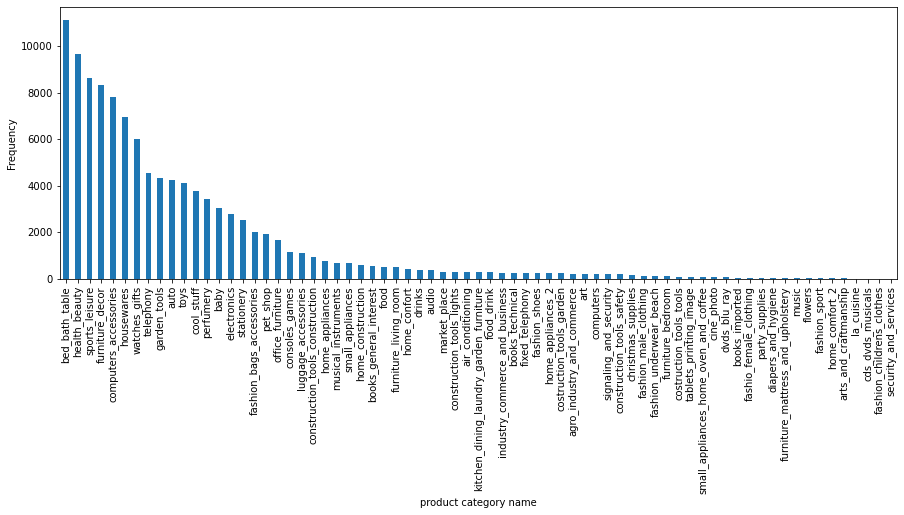

In [163]:
plt.xlabel('product category name')
plt.ylabel('Frequency')
data['product_category_name_english'].value_counts().plot(kind='bar', figsize = (15,5))

### Finding the index of the maximum product category each year

In [158]:
mask = data['purchase_year']==2016
tw = pd.crosstab(data.loc[mask, "product_category_name_english"] , data.loc[mask, "purchase_year"]).idxmax()
pd.DataFrame({'product_category_name': tw})

product_category_name
purchase_year                      
2016                furniture_decor

In [159]:
mask = data['purchase_year']==2017
tw = pd.crosstab(data.loc[mask, "product_category_name_english"] , data.loc[mask, "purchase_year"]).idxmax()
pd.DataFrame({'product_category_name': tw})

product_category_name
purchase_year                      
2017                 bed_bath_table

In [160]:
mask = data['purchase_year']==2018
tw = pd.crosstab(data.loc[mask, "product_category_name_english"] , data.loc[mask, "purchase_year"]).idxmax()
pd.DataFrame({'product_category_name': tw})

product_category_name
purchase_year                      
2018                  health_beauty

## The most selling occur in purchase year

Text(0, 0.5, 'Frequency')

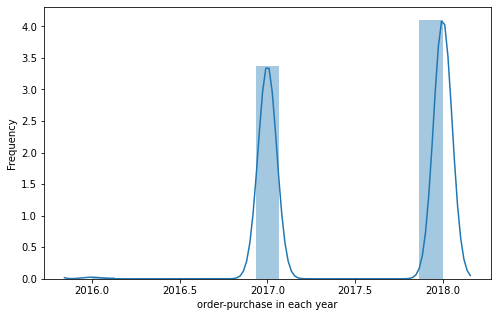

In [29]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.distplot(purchase.purchase_year, bins = 15)
plt.ticklabel_format(style='plain', axis='x',scilimits=(0,1))
plt.xlabel("order-purchase in each year")
plt.ylabel("Frequency")

## The most selling occur each month in each year(2016,2017,2018)

In [30]:
mask = data['purchase_year'] == 2016
month = data.loc[mask, 'purchase_month']

Text(0, 0.5, 'Frequency')

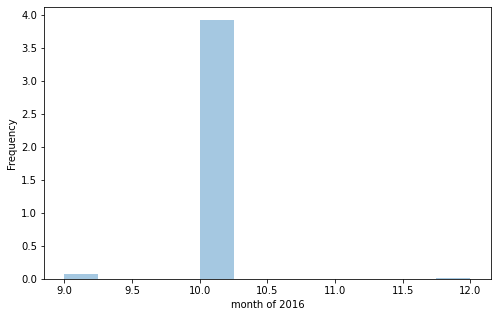

In [31]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.distplot(month, bins = 12)
plt.ticklabel_format(style='plain', axis='x',scilimits=(0,1))
plt.xlabel("month of 2016")
plt.ylabel("Frequency")

In [32]:
mask = data['purchase_year'] == 2017
month = data.loc[mask, 'purchase_month']

Text(0, 0.5, 'Number of sale')

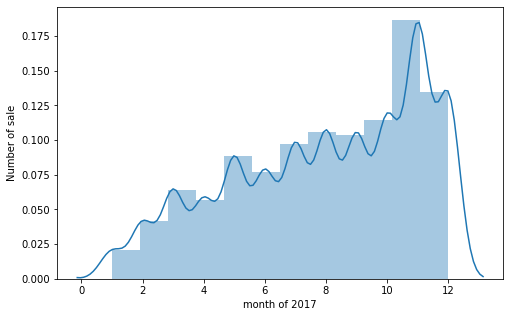

In [33]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.distplot(month, bins = 12)
plt.ticklabel_format(style='plain', axis='x',scilimits=(0,1))
plt.xlabel("month of 2017")
plt.ylabel("Number of sale")

In [34]:
mask = data['purchase_year'] == 2018
month = data.loc[mask, 'purchase_month']

Text(0, 0.5, 'Frequency')

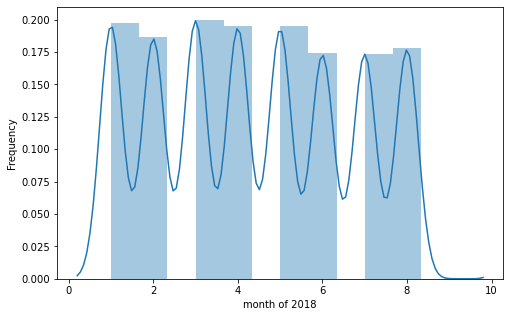

In [35]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.distplot(month, bins = 12)
plt.ticklabel_format(style='plain', axis='x',scilimits=(0,1))
plt.xlabel("month of 2018")
plt.ylabel("Frequency")

In [36]:
data.columns

Index(['order_item_id', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_purchase_timestamp',
       'purchase_month', 'purchase_day', 'purchase_year', 'purchase_week',
       'purchase_hour', 'purchase_minute'],
      dtype='object')

In [22]:
df = data[['order_item_id','price', 'freight_value','product_description_lenght','product_photos_qty', 'product_weight_g',
           'product_length_cm', 'product_height_cm', 'product_width_cm' ]]

In [23]:
target = data.product_name_lenght
target.head()

0    58.0
1    58.0
2    58.0
3    58.0
4    58.0
Name: product_name_lenght, dtype: float64

In [24]:
target.shape

(111023,)

In [25]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_test = train_test_split(df, target, test_size = 0.2, random_state=33)
test.head()

order_item_id  price  freight_value  product_description_lenght  \
71690              2   84.9          16.32                        88.0   
47712              1   44.9          15.10                        81.0   
51376              1  129.9          23.49                       189.0   
29852              1  289.0          17.46                      1892.0   
98475              1   15.9          14.10                       908.0   

       product_photos_qty  product_weight_g  product_length_cm  \
71690                 2.0            3200.0               44.0   
47712                 1.0             400.0               20.0   
51376                 1.0            1650.0               46.0   
29852                 4.0             450.0               17.0   
98475                 1.0              75.0               17.0   

       product_height_cm  product_width_cm  
71690               15.0              30.0  
47712                2.0              15.0  
51376                3.0              34.0  
29852                3.0              11.0  
98475                8.0              13.0

In [26]:
train.shape, test.shape, target_train.shape, target_test.shape, target.shape

((88818, 9), (22205, 9), (88818,), (22205,), (111023,))

## Perform standard linear Regression

Perform standard linear regression on data using the closed form solution implementation.

In [73]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [74]:
# In order to do multiple regression we need to add a column of 1s as the coefficient for x0
x = np.array([np.concatenate((v,[1])) for v in np.array(train)])
y = np.array(target_train)
print(x.shape)
print(y.shape)

(88818, 10)
(88818,)


In [75]:
w = standRegres(x, y)
print(w)

[[-1.93088284e-01]
 [-8.04937007e-04]
 [ 6.55241672e-03]
 [ 1.33532870e-03]
 [ 7.64749564e-01]
 [-1.00960904e-05]
 [ 1.86373986e-02]
 [-3.92637571e-02]
 [ 5.88344142e-02]
 [ 4.49707767e+01]]


In [76]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w

In [77]:
yHat.shape

(88818, 1)

In [78]:
# Now we can constuct an array of errors
err = abs(yHat.T-y)
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err.T)

# Let's see the error on the first 10 predictions
print(err[:10])

[[11.69805299 10.42799166  8.436773   ...  5.981001   16.06643415
   5.78855091]]


In [79]:
# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  [[9.84608356]]


In [80]:
# Let's put some names to the faces
for i in range(len(train.columns.values)):
    print("%7s   %2.2f" % (train.columns.values[i], w[i]))

order_item_id   -0.19
  price   -0.00
freight_value   0.01
product_description_lenght   0.00
product_photos_qty   0.76
product_weight_g   -0.00
product_length_cm   0.02
product_height_cm   -0.04
product_width_cm   0.06


In [81]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state = None)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        
        w = model(X[train], y[train])
        xMat=np.mat(X[train])        
        yMat=np.mat(y[train])
        p = (x[test])* w      
        
        e = abs(p.T - y[test])
        rmse = np.sqrt(np.dot(e,e.T)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [82]:
rmse_10cv = cross_validate(standRegres, x, y, 10, verbose=True)

Fold  1 RMSE: 9.7686
Fold  2 RMSE: 9.9771
Fold  3 RMSE: 9.8626
Fold  4 RMSE: 9.9005
Fold  5 RMSE: 9.8216
Fold  6 RMSE: 9.8843
Fold  7 RMSE: 9.7329
Fold  8 RMSE: 9.8845
Fold  9 RMSE: 9.8262
Fold 10 RMSE: 9.8103


In [83]:
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on training: 9.8461
RMSE on 10-fold CV: 9.8469


#### Using the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression.

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn.metrics import mean_absolute_error

# Create linear regression object
linreg = LinearRegression()
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(train, target_train)
    scores = abs(cross_val_score(linreg, X_train_fs, target_train, cv=5, scoring = 'neg_mean_absolute_error'))
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

 1  8.1508
 6  8.1508
11  8.1508
16  8.1181
21  8.1181
26  8.0862
31  8.0862
36  8.0862
41  8.0843
46  8.0843
51  8.0637
56  8.0637
61  8.0637
66  8.0636
71  8.0636
76  8.0635
81  8.0635
86  8.0635
91  8.0624
96  8.0624


In [85]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(train.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

Optimal percentile of features:91 

Optimal number of features:8 



Text(0, 0.5, 'The mean absolute error on CV')

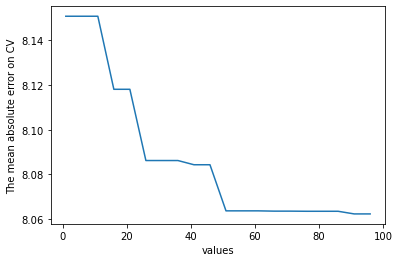

In [86]:
#plot the training and testing scores in a log scale
plt.plot(percentiles,results)
plt.xlabel("values")
plt.ylabel("The mean absolute error on CV")

#### train model on the full 80% training data and evaluate it using the set-aside 20% test partition

In [87]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 91)
X_train_fs = fs.fit_transform(train, target_train)

# Train the model using the training set
linreg.fit(X_train_fs, target_train)
p = linreg.predict(fs.transform(test))

# Now we can constuct an array of errors
err = abs(p - target_test)

# Finally compute RMSE
rmse_test = np.sqrt(np.dot(err,err)/len(p))
print("RMSE on Testing Data: ", rmse_test)

RMSE on Testing Data:  9.861479445959116


#### Perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model.

In [88]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold

In [107]:
# Let's create an evenly spaced range of numbers in a specified interval
alpha = np.linspace(.001, 10, 50)

lasso = Lasso()
ridge = Ridge()

In [108]:
def calc_params(X, y, tempName, param_values, param_name, K):
    print('alpha\t training\t testing\n')
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)
    verbose = True
    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        tempName.set_params(**{param_name:param_value})
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation

        cv = KFold(n_splits=K, shuffle=True, random_state=0)

        # iterate over the K folds
        j = 0
        for  train, test in cv.split(X):
        
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            tempName.fit(X[train], y[train])
           
            train_p = tempName.predict(X[train])
            test_p = tempName.predict(X[test])
            
            k_train_scores[j] = mean_absolute_error(y[train], train_p)
            k_test_scores[j] = mean_absolute_error(y[test], test_p)
            j += 1
        
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        if verbose:
            print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(param_value, train_scores[i], test_scores[i]))
        
    val_min = np.where(test_scores == test_scores.min())
    alpha_min = param_values[val_min] 
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Training', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='cross-val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    print("Minimun Error :", test_scores[val_min][0])
    print("The optimal alpha parameter:", alpha_min[0])
    # return the training and testing scores on each parameter value
    return train_scores, test_scores

Ridge Regression
alpha	 training	 testing

0.001	 8.0596		 8.0609
0.205	 8.0596		 8.0609
0.409	 8.0596		 8.0609
0.613	 8.0596		 8.0609
0.817	 8.0596		 8.0609
1.021	 8.0596		 8.0609
1.225	 8.0596		 8.0609
1.429	 8.0596		 8.0609
1.633	 8.0596		 8.0609
1.838	 8.0596		 8.0609
2.042	 8.0596		 8.0609
2.246	 8.0596		 8.0609
2.450	 8.0596		 8.0609
2.654	 8.0596		 8.0609
2.858	 8.0596		 8.0609
3.062	 8.0596		 8.0609
3.266	 8.0596		 8.0609
3.470	 8.0596		 8.0609
3.674	 8.0596		 8.0609
3.878	 8.0596		 8.0609
4.082	 8.0596		 8.0609
4.286	 8.0596		 8.0609
4.490	 8.0596		 8.0609
4.694	 8.0596		 8.0609
4.898	 8.0596		 8.0609
5.103	 8.0596		 8.0609
5.307	 8.0596		 8.0609
5.511	 8.0596		 8.0609
5.715	 8.0596		 8.0609
5.919	 8.0596		 8.0609
6.123	 8.0596		 8.0609
6.327	 8.0596		 8.0609
6.531	 8.0596		 8.0609
6.735	 8.0596		 8.0609
6.939	 8.0596		 8.0609
7.143	 8.0596		 8.0609
7.347	 8.0596		 8.0609
7.551	 8.0596		 8.0609
7.755	 8.0596		 8.0609
7.959	 8.0596		 8.0609
8.163	 8.0596		 8.0609
8.368	 8.0596	

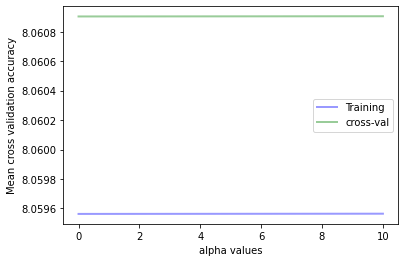

In [109]:
print('Ridge Regression')
tempName = ridge
train_scores, test_scores = calc_params(train, target_train, ridge, alpha, 'alpha', 5)

Lasso Regression
alpha	 training	 testing

0.001	 8.0596		 8.0609
0.205	 8.0652		 8.0664
0.409	 8.0703		 8.0715
0.613	 8.0763		 8.0775
0.817	 8.0831		 8.0843
1.021	 8.0908		 8.0919
1.225	 8.0997		 8.1008
1.429	 8.1092		 8.1103
1.633	 8.1198		 8.1209
1.838	 8.1311		 8.1322
2.042	 8.1432		 8.1442
2.246	 8.1557		 8.1566
2.450	 8.1587		 8.1595
2.654	 8.1604		 8.1612
2.858	 8.1622		 8.1630
3.062	 8.1640		 8.1647
3.266	 8.1658		 8.1666
3.470	 8.1677		 8.1685
3.674	 8.1696		 8.1704
3.878	 8.1716		 8.1724
4.082	 8.1736		 8.1744
4.286	 8.1757		 8.1765
4.490	 8.1778		 8.1786
4.694	 8.1800		 8.1807
4.898	 8.1821		 8.1829
5.103	 8.1844		 8.1851
5.307	 8.1866		 8.1874
5.511	 8.1889		 8.1897
5.715	 8.1912		 8.1920
5.919	 8.1931		 8.1938
6.123	 8.1946		 8.1954
6.327	 8.1961		 8.1969
6.531	 8.1975		 8.1982
6.735	 8.1985		 8.1992
6.939	 8.1995		 8.2002
7.143	 8.2004		 8.2010
7.347	 8.2012		 8.2018
7.551	 8.2019		 8.2025
7.755	 8.2027		 8.2032
7.959	 8.2034		 8.2040
8.163	 8.2041		 8.2047
8.368	 8.2049	

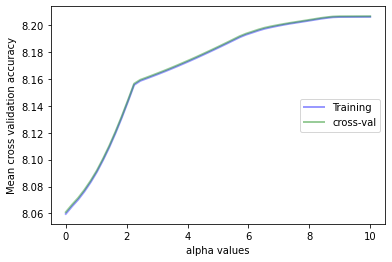

In [105]:
alpha = np.linspace(0.001, 10, 50)
alpha = np.array([float(e) for e in alpha])
print('Lasso Regression')
tempName = lasso
train_scores, test_scores = calc_params(train, target_train, tempName, alpha, 'alpha', 5)

In [110]:
ridge = Ridge(alpha=4.490571428571429)
ridge.fit(train,target_train)
p = ridge.predict(test)
e = abs(p-target_test)
rmse = np.sqrt(np.dot(e,e)/len(p))
print("Ridge Regression")
print("RMSE on testing:",rmse)

Ridge Regression
RMSE on testing: 9.860387795708471


In [111]:
lasso = Lasso(alpha=0.001)
lasso.fit(train,target_train)
p = lasso.predict(test)
e = abs(p-target_test)

rmse = np.sqrt(np.dot(e,e)/len(p))
print("Lasso Regression")
print("RMSE on testing:",rmse)

Lasso Regression
RMSE on testing: 9.860380713047629


## Perform Classification

#### Use KNN classifier

In [112]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 

In [113]:
df2 = data[['order_item_id','price', 'freight_value','product_description_lenght','product_photos_qty', 'product_weight_g',
           'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [114]:
target2 = data.product_category_name_english
target2.head()

0    cool_stuff
1    cool_stuff
2    cool_stuff
3    cool_stuff
4    cool_stuff
Name: product_category_name_english, dtype: object

In [115]:
from sklearn.model_selection import train_test_split
train2, test2, target_train2, target_test2 = train_test_split(df2, target2, test_size = 0.2, random_state=33)
test.head()

order_item_id  price  freight_value  product_description_lenght  \
71690              2   84.9          16.32                        88.0   
47712              1   44.9          15.10                        81.0   
51376              1  129.9          23.49                       189.0   
29852              1  289.0          17.46                      1892.0   
98475              1   15.9          14.10                       908.0   

       product_photos_qty  product_weight_g  product_length_cm  \
71690                 2.0            3200.0               44.0   
47712                 1.0             400.0               20.0   
51376                 1.0            1650.0               46.0   
29852                 4.0             450.0               17.0   
98475                 1.0              75.0               17.0   

       product_height_cm  product_width_cm  
71690               15.0              30.0  
47712                2.0              15.0  
51376                3.0              34.0  
29852                3.0              11.0  
98475                8.0              13.0

In [116]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train2)

train_norm = min_max_scaler.transform(train2)
train_norm = pd.DataFrame(train_norm, columns=train.columns, index=train.index)

test_norm = min_max_scaler.transform(test)
test_norm = pd.DataFrame(test_norm, columns=test.columns, index=test.index)

In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [118]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(train_norm, target_train2)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [119]:
knnpreds_test = knnclf.predict(test_norm)
print(knnpreds_test)

['bed_bath_table' 'bed_bath_table' 'bed_bath_table' ... 'furniture_decor'
 'housewares' 'office_furniture']


In [120]:
print(classification_report(target_test2, knnpreds_test))

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.97      0.67      0.79        45
                       air_conditioning       0.91      0.59      0.72        69
                                    art       0.90      0.73      0.80        48
                  arts_and_craftmanship       0.00      0.00      0.00         2
                                  audio       0.79      0.81      0.80        79
                                   auto       0.78      0.71      0.74       849
                                   baby       0.79      0.75      0.77       651
                         bed_bath_table       0.84      0.93      0.89      2176
                 books_general_interest       0.74      0.64      0.69       107
                         books_imported       0.92      0.85      0.88        13
                        books_technical       0.83      0.72      0.77        60
                      cds_d

#### with weights distance

In [121]:
for n_neighbors in range(1,12):
    knnclf_D = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    knnclf_D.fit(train_norm, target_train2)
    print('Range of values K: %s =>  %s ' %(n_neighbors, knnclf_D.score(test_norm, target_test2)))

Range of values K: 1 =>  0.8423328079261427 
Range of values K: 2 =>  0.8423328079261427 
Range of values K: 3 =>  0.8356676424228777 
Range of values K: 4 =>  0.8304435937851835 
Range of values K: 5 =>  0.8249493357351948 
Range of values K: 6 =>  0.8212114388651205 
Range of values K: 7 =>  0.8177887863093898 
Range of values K: 8 =>  0.8141409592434137 
Range of values K: 9 =>  0.8108984462958793 
Range of values K: 10 =>  0.8070254447196578 
Range of values K: 11 =>  0.8037829317721233 


In [122]:
knnpreds_test = knnclf_D.predict(test_norm)
print(classification_report(target_test2, knnpreds_test))

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.97      0.64      0.77        45
                       air_conditioning       0.91      0.57      0.70        69
                                    art       0.90      0.73      0.80        48
                  arts_and_craftmanship       0.00      0.00      0.00         2
                                  audio       0.78      0.80      0.79        79
                                   auto       0.78      0.71      0.74       849
                                   baby       0.78      0.75      0.76       651
                         bed_bath_table       0.84      0.93      0.88      2176
                 books_general_interest       0.75      0.64      0.69       107
                         books_imported       0.92      0.85      0.88        13
                        books_technical       0.84      0.72      0.77        60
                      cds_d

#### without weights distance

In [123]:
for n_neighbors in range(1,12):
    knnclf1 = neighbors.KNeighborsClassifier(n_neighbors)
    knnclf1.fit(train_norm, target_train2)
    print('Range of values K: %s =>  %s ' %(n_neighbors, knnclf1.score(test_norm, target_test2)))

Range of values K: 1 =>  0.8423328079261427 
Range of values K: 2 =>  0.8021166403963071 
Range of values K: 3 =>  0.7896870074307588 
Range of values K: 4 =>  0.7761765368160324 
Range of values K: 5 =>  0.7654131952263004 
Range of values K: 6 =>  0.7502814681378068 
Range of values K: 7 =>  0.741184417923891 
Range of values K: 8 =>  0.731456879081288 
Range of values K: 9 =>  0.7224498986714704 
Range of values K: 10 =>  0.7131276739473091 
Range of values K: 11 =>  0.7072731366809277 


In [124]:
knnpreds_test = knnclf1.predict(test_norm)
print(classification_report(target_test2, knnpreds_test))

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.74      0.56      0.63        45
                       air_conditioning       0.68      0.41      0.51        69
                                    art       0.74      0.65      0.69        48
                  arts_and_craftmanship       0.00      0.00      0.00         2
                                  audio       0.63      0.72      0.67        79
                                   auto       0.59      0.60      0.60       849
                                   baby       0.63      0.65      0.64       651
                         bed_bath_table       0.75      0.90      0.82      2176
                 books_general_interest       0.51      0.46      0.48       107
                         books_imported       0.62      0.62      0.62        13
                        books_technical       0.66      0.52      0.58        60
                      cds_d

According to the experiment with and without weights distance. It shows that with weights distance gives me the better accuracy results than witout weight diatance

#### Using scikit-learn's dicision tree

In [125]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(train2, target_train2)
treepreds_test = treeclf.predict(test2)
print(treepreds_test)

['computers_accessories' 'bed_bath_table' 'bed_bath_table' ...
 'construction_tools_lights' 'housewares' 'office_furniture']


In [126]:
print(classification_report(target_test2, treepreds_test))

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.81      0.76      0.78        45
                       air_conditioning       0.80      0.71      0.75        69
                                    art       0.83      0.73      0.78        48
                  arts_and_craftmanship       0.00      0.00      0.00         2
                                  audio       0.86      0.89      0.87        79
                                   auto       0.80      0.78      0.79       849
                                   baby       0.84      0.84      0.84       651
                         bed_bath_table       0.92      0.93      0.93      2176
                 books_general_interest       0.72      0.74      0.73       107
                         books_imported       0.65      0.85      0.73        13
                        books_technical       0.81      0.83      0.82        60
                      cds_d

In [127]:
print('Average accuracy score on test data: %s ' %(treeclf.score(test2, target_test2)))

Average accuracy score on test data: 0.8655708173834722 


In [128]:
print('Average accuracy score on train data: %s ' %(treeclf.score(train2, target_train2)))

Average accuracy score on train data: 0.9999437051048211 


## PCA for reduced Dimensionality in Clustering

In [129]:
min_max_scaler = preprocessing.MinMaxScaler().fit(df)

data_norm = min_max_scaler.transform(df)

In [130]:
data_norm[:10]

array([[0.        , 0.00862024, 0.03243995, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.        , 0.00817475, 0.04383909, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.        , 0.00951122, 0.04474224, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.        , 0.00862024, 0.03946983, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.        , 0.00862024, 0.03243995, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.        , 0.00817475, 0.06573423, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.        , 0.00951122, 0.09397579, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],
       [0.05      , 0.00862024, 0.04422964, 0.14894684, 0.15789474,
        0.01607916, 0.21428571, 0.06796117, 0.07142857],


In [131]:
from sklearn.metrics import classification_report

In [132]:
kmeans = KMeans(n_clusters=6, max_iter=500, verbose=1) # initialization
kmeans.fit(data_norm)

Initialization complete
Iteration 0, inertia 6604.328680870633
Iteration 1, inertia 5175.081867895968
Iteration 2, inertia 4975.092812277061
Iteration 3, inertia 4903.710386558835
Iteration 4, inertia 4872.920238652683
Iteration 5, inertia 4857.163335928288
Iteration 6, inertia 4848.274132726113
Iteration 7, inertia 4844.536333428934
Iteration 8, inertia 4842.113961152457
Iteration 9, inertia 4841.141005281726
Iteration 10, inertia 4840.182661840531
Iteration 11, inertia 4839.572468085826
Iteration 12, inertia 4839.049377827678
Iteration 13, inertia 4838.542909227053
Iteration 14, inertia 4838.327092402594
Iteration 15, inertia 4838.246853081786
Iteration 16, inertia 4838.226138809137
Converged at iteration 16: center shift 2.964964256220539e-07 within tolerance 1.137801549375911e-06.
Initialization complete
Iteration 0, inertia 6929.354795121164
Iteration 1, inertia 5164.83040805237
Iteration 2, inertia 4997.380885029033
Iteration 3, inertia 4933.7751873632515
Iteration 4, inertia 489

Iteration 5, inertia 5370.050301127596
Iteration 6, inertia 5160.201547921085
Iteration 7, inertia 5005.789396056461
Iteration 8, inertia 4953.354055898511
Iteration 9, inertia 4937.958337254532
Iteration 10, inertia 4932.453438072682
Iteration 11, inertia 4930.327111682335
Iteration 12, inertia 4928.657881434474
Iteration 13, inertia 4925.953582719318
Iteration 14, inertia 4922.67282018845
Iteration 15, inertia 4916.618935343613
Iteration 16, inertia 4902.424524031187
Iteration 17, inertia 4884.398401862694
Iteration 18, inertia 4864.879826366082
Iteration 19, inertia 4843.253694890533
Iteration 20, inertia 4822.648548336746
Iteration 21, inertia 4809.223686510333
Iteration 22, inertia 4803.607486842583
Iteration 23, inertia 4801.864058857333
Iteration 24, inertia 4801.325559952958
Iteration 25, inertia 4801.214248870412
Converged at iteration 25: center shift 9.962435385469157e-07 within tolerance 1.137801549375911e-06.
Initialization complete
Iteration 0, inertia 6988.200593103999
I

KMeans(max_iter=500, n_clusters=6, verbose=1)

In [133]:
clusters = kmeans.predict(data_norm)
pd.DataFrame(clusters, columns=["Cluster"])

Cluster
0             0
1             0
2             0
3             0
4             0
...         ...
111018        2
111019        0
111020        2
111021        0
111022        2

[111023 rows x 1 columns]

In [134]:
columns_name = ["cluster:1","cluster:2","cluster:3","cluster:4","cluster:5","cluster:6"]

In [135]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_.T, columns = columns_name)
centroids

cluster:1  cluster:2  cluster:3  cluster:4  cluster:5  cluster:6
0       0.01       0.01       0.01       0.01       0.01       0.01
1       0.01       0.04       0.02       0.03       0.02       0.02
2       0.04       0.11       0.05       0.05       0.05       0.07
3       0.12       0.22       0.12       0.71       0.33       0.21
4       0.06       0.06       0.06       0.09       0.07       0.09
5       0.01       0.30       0.05       0.04       0.03       0.12
6       0.13       0.37       0.32       0.21       0.16       0.66
7       0.08       0.51       0.15       0.14       0.14       0.11
8       0.09       0.26       0.22       0.13       0.11       0.28

In [136]:
from sklearn import metrics

In [137]:
silhouettes = metrics.silhouette_samples(data_norm, clusters)
print(silhouettes[:20])

[0.31916821 0.31847286 0.31834323 0.31889874 0.31916821 0.31337736
 0.30026672 0.30973964 0.19832245 0.30403459 0.23579645 0.21707834
 0.23578316 0.23472047 0.23269651 0.22455407 0.31905445 0.23579645
 0.22986106 0.23470165]


In [138]:
print("Over all mean silhouettes: %s " %(silhouettes.mean()))

Over all mean silhouettes: 0.24161738098425942 


In [139]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

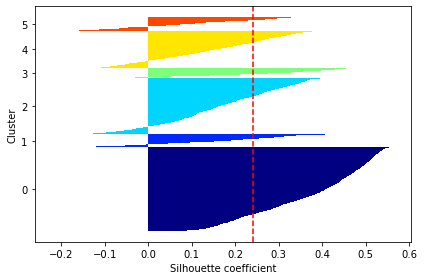

In [140]:
plot_silhouettes(data_norm, clusters)

In [141]:
from sklearn.metrics import completeness_score, homogeneity_score

In [142]:
clusters.shape

(111023,)

In [143]:
print("completeness_score: %s " %(completeness_score(target ,clusters)))

completeness_score: 0.024503756787998543 


In [144]:
print("homogeneity_score:  %s" %(homogeneity_score(target ,clusters)))

homogeneity_score:  0.010632049248690894


#### Using Decomposition module to perform PCA

In [145]:
pca = decomposition.PCA(n_components=8)
DTtrans = pca.fit(data_norm).transform(data_norm)

In [146]:
print(pca.explained_variance_ratio_)

[0.36585926 0.26571043 0.16464256 0.07801066 0.0633909  0.03579274
 0.01222756 0.00925239]


In [147]:
num = 0
res = 0
val = pca.explained_variance_ratio_
for i in range(len(val)):
    res = res + (val[i]*100) 
    num = num + 1
    count = i + 1
    print("PC %s : %s " %(count, res))

PC 1 : 36.58592571123896 
PC 2 : 63.15696845472364 
PC 3 : 79.62122474905806 
PC 4 : 87.42229026656182 
PC 5 : 93.76138015039402 
PC 6 : 97.34065436478336 
PC 7 : 98.56341015640683 
PC 8 : 99.48864909704906 


Therefore, PC from 1 until 6 can capture 95% of variance in the data.

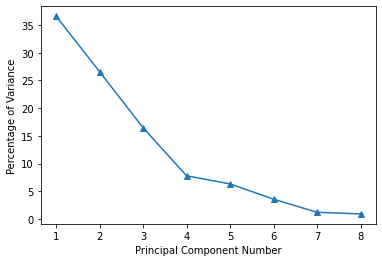

In [148]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 9), val*100, marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

#### Using 6 componants as features to transform the data into a reduce dimension space

In [108]:
pca_95percent = decomposition.PCA(n_components=6)
datatrans = pca_95percent.fit(data_norm).transform(data_norm)

In [109]:
np.set_printoptions(precision=2,suppress=True)
print(datatrans)

[[-0.09 -0.04 -0.06  0.09 -0.05  0.02]
 [-0.09 -0.04 -0.06  0.09 -0.05  0.02]
 [-0.09 -0.04 -0.06  0.09 -0.05  0.02]
 ...
 [-0.02 -0.11  0.03  0.05 -0.05 -0.04]
 [-0.03 -0.11  0.02  0.05 -0.05 -0.05]
 [ 0.01 -0.08 -0.09  0.09  0.   -0.03]]


In [110]:
kmeansD = KMeans(n_clusters=6, max_iter=500, verbose=1) # initialization
kmeansD.fit(datatrans)

Initialization complete
Iteration 0, inertia 6841.653630528504
Iteration 1, inertia 4831.369032739414
Iteration 2, inertia 4673.035910759561
Iteration 3, inertia 4582.051885135073
Iteration 4, inertia 4554.670349347771
Iteration 5, inertia 4547.599542913725
Iteration 6, inertia 4543.289777213312
Iteration 7, inertia 4539.9939609577
Iteration 8, inertia 4538.572493617657
Iteration 9, inertia 4537.344938151363
Iteration 10, inertia 4536.828257352953
Iteration 11, inertia 4536.412200405653
Iteration 12, inertia 4536.335770354847
Converged at iteration 12: center shift 1.382463123322205e-06 within tolerance 1.6613152103029398e-06.
Initialization complete
Iteration 0, inertia 6242.165887070469
Iteration 1, inertia 5125.930159670853
Iteration 2, inertia 4895.703656256772
Iteration 3, inertia 4820.667944570865
Iteration 4, inertia 4804.4543827404
Iteration 5, inertia 4798.234621768524
Iteration 6, inertia 4795.848785287484
Iteration 7, inertia 4794.998299558338
Iteration 8, inertia 4794.69628

KMeans(max_iter=500, n_clusters=6, verbose=1)

In [111]:
clustersD = kmeansD.predict(datatrans)
pd.DataFrame(clustersD, columns=["Cluster"])

Cluster
0             0
1             0
2             0
3             0
4             0
...         ...
111018        3
111019        0
111020        3
111021        0
111022        3

[111023 rows x 1 columns]

In [112]:
columns_name = ["cluster:1","cluster:2","cluster:3","cluster:4","cluster:5","cluster:6"]

In [113]:
pd.options.display.float_format='{:,.2f}'.format
centroids = pd.DataFrame(kmeansD.cluster_centers_, columns = columns_name)
centroids

cluster:1  cluster:2  cluster:3  cluster:4  cluster:5  cluster:6
0      -0.15      -0.07       0.01       0.00      -0.01       0.02
1       0.38       0.04       0.30       0.02      -0.02       0.04
2       0.00       0.51      -0.07      -0.02       0.02      -0.01
3       0.09      -0.09      -0.02      -0.00       0.02      -0.03
4      -0.08       0.14       0.01      -0.00       0.00      -0.00
5       0.39      -0.04      -0.22      -0.01      -0.03      -0.00

In [114]:
silhouettesD = metrics.silhouette_samples(datatrans, clustersD)
print(silhouettesD[:20])

[0.33 0.33 0.33 0.33 0.33 0.32 0.32 0.33 0.2  0.32 0.24 0.24 0.24 0.24
 0.24 0.24 0.39 0.24 0.24 0.24]


In [115]:
print("Over all mean silhouettes: %s " %(silhouettesD.mean()))

Over all mean silhouettes: 0.25394330819802063 


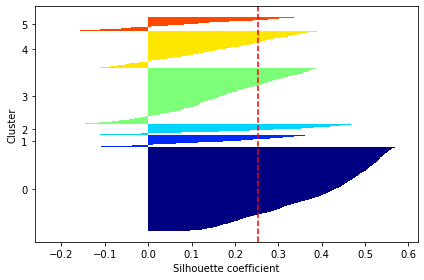

In [116]:
plot_silhouettes(datatrans, clustersD)

In [117]:
print("completeness_score: %s " %(completeness_score(target,clustersD)))

completeness_score: 0.02447060904776455 


In [118]:
print("homogeneity_score:  %s" %(homogeneity_score(target,clustersD)))

homogeneity_score:  0.010618304631575795


## Peform Random Forest

In [27]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

#### Decision Tree Classifier

In [28]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(train, target_train)

In [29]:
from sklearn import metrics
measure_performance(test, target_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.791 



#### RandomForest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=33)
rf = rf.fit(train, target_train)

In [65]:
measure_performance(test, target_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.811 



#### Exploring and comparing model parameters

In [66]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


In [67]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [75]:
msl = range(1,20)
print(msl)

range(1, 20)


min_samples_leaf = 1 Train = 0.9945506540495165 Test = 0.7974847505183817
min_samples_leaf = 2 Train = 0.9657101550362224 Test = 0.7775450823786023
min_samples_leaf = 3 Train = 0.9280326074162305 Test = 0.7544754796722893
min_samples_leaf = 4 Train = 0.8925030196574287 Test = 0.7345133435230229
min_samples_leaf = 5 Train = 0.8626567183948441 Test = 0.7180301091864381
min_samples_leaf = 6 Train = 0.8360967920883363 Test = 0.701839677777076
min_samples_leaf = 7 Train = 0.8133023565949848 Test = 0.6897926411773314
min_samples_leaf = 8 Train = 0.793582879175978 Test = 0.6758990480881325
min_samples_leaf = 9 Train = 0.7757649270429015 Test = 0.6657659580612538
min_samples_leaf = 10 Train = 0.7605678021813727 Test = 0.656477318086138
min_samples_leaf = 11 Train = 0.745632143513953 Test = 0.645983908275451
min_samples_leaf = 12 Train = 0.7310517647076116 Test = 0.6371005786155817
min_samples_leaf = 13 Train = 0.7191510234189077 Test = 0.629219278061768
min_samples_leaf = 14 Train = 0.70857758

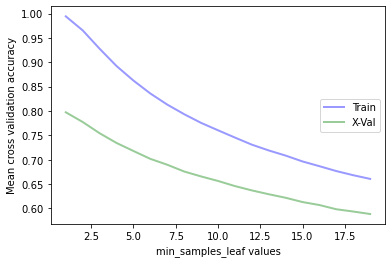

In [76]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(train, target_train, rf, msl, 'min_samples_leaf', 10)

#### Looks like min_sample = 1 is works well

max_depth = 1 Train = 0.08069685494946367 Test = 0.0807155780219029
max_depth = 2 Train = 0.08436227727944642 Test = 0.0840032196836345
max_depth = 3 Train = 0.10321231292926807 Test = 0.1028282232884297
max_depth = 4 Train = 0.1251448134876792 Test = 0.12363475117379914
max_depth = 5 Train = 0.1553976900574214 Test = 0.1538088416732629
max_depth = 6 Train = 0.18437327501266934 Test = 0.18051525358906897
max_depth = 7 Train = 0.22597770555411265 Test = 0.22056349357048305
max_depth = 8 Train = 0.277306168120255 Test = 0.26727675073054946
max_depth = 9 Train = 0.33712760939264186 Test = 0.3186628480389496
max_depth = 10 Train = 0.3977659643132899 Test = 0.3703191256018144
max_depth = 11 Train = 0.46714006599402386 Test = 0.42546543946516324
max_depth = 12 Train = 0.5344887607422592 Test = 0.4797788130131445
max_depth = 13 Train = 0.6004250824568483 Test = 0.5285753920441365
max_depth = 14 Train = 0.6613887074137585 Test = 0.5729919452636034
max_depth = 15 Train = 0.7296018607735557 Test

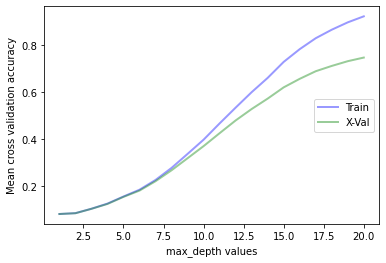

In [73]:
m_depth = [1,2,3,4,5,6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20]

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(train, target_train, rf, m_depth, 'max_depth', 10)

#### Looks like max depth 20 works well.

In [37]:
nest = range(5, 101, 5)
print(nest)

range(5, 101, 5)


n_estimators = 5 Train = 0.9806270510547573 Test = 0.774854206413754
n_estimators = 10 Train = 0.9945506540495165 Test = 0.7974847505183817
n_estimators = 15 Train = 0.9963370786700292 Test = 0.8035083131888647
n_estimators = 20 Train = 0.9968087046885842 Test = 0.8051633864065844
n_estimators = 25 Train = 0.9969863463014803 Test = 0.80680720723745
n_estimators = 30 Train = 0.9970714140742271 Test = 0.8086086312095115
n_estimators = 35 Train = 0.9971177010569011 Test = 0.809205367748565
n_estimators = 40 Train = 0.9971389680079128 Test = 0.8098921614143991
n_estimators = 45 Train = 0.9971627369761753 Test = 0.8100948197413519
n_estimators = 50 Train = 0.9971739959833812 Test = 0.8101961596805479
n_estimators = 55 Train = 0.9971827529889856 Test = 0.8105339011622081
n_estimators = 60 Train = 0.9971865059757377 Test = 0.810725313440966
n_estimators = 65 Train = 0.9971902589781397 Test = 0.8109730180795532
n_estimators = 70 Train = 0.9971977649672936 Test = 0.8110518278904074
n_estimators

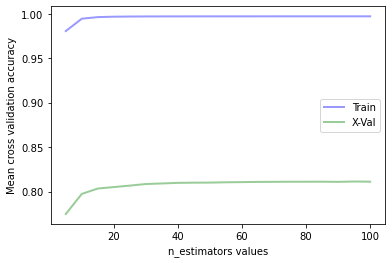

In [77]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(train, target_train, rf, nest, 'n_estimators', 10)

#### Looks like n_estimator = 95 is the best one

In [78]:
rf = RandomForestClassifier(n_estimators=95, min_samples_leaf=1, max_depth=20)
rf = rf.fit(train, target_train)

measure_performance(test, target_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.810 

